# Selective Fit

In [1]:
import numpy as np
from smpl import plot
from smpl import io
from smpl import stat
from smpl import functions as f
import uncertainties.unumpy as unp
import smpl
np.random.seed(1337)
smpl.__version__

'0.0.112.0+dirty'

In [2]:

data = np.loadtxt(io.find_file('test_data.txt',3))
xdata = data[:,0]
xerr = data[:,2]
ydata = data[:,1]
yerr = data[:,3]
x = unp.uarray(xdata,xerr)
y = unp.uarray(ydata,yerr)

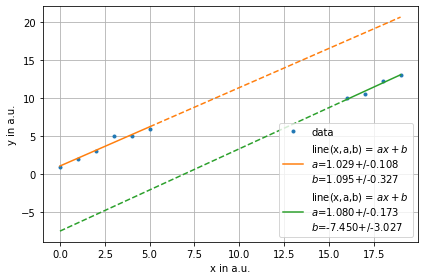

In [3]:


ff = plot.fit(xdata, ydata, fmt='.', label='data', xlabel="x in a.u.",ylabel="y in a.u.",function=f.line, frange=[0,6])
ff = plot.fit(xdata, ydata, fmt='.', label='data', xlabel="x in a.u.",ylabel="y in a.u.",function=f.line, frange=[6,10],also_data=False)

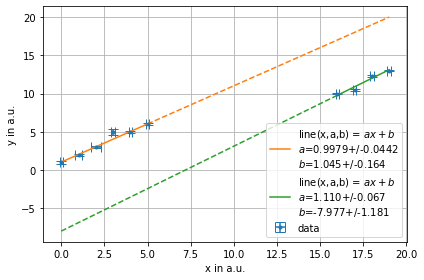

In [4]:

ff = plot.fit(x, y, fmt='.', label='data', xlabel="x in a.u.",ylabel="y in a.u.",function=f.line, fselector=lambda x,y : x<10)
ff = plot.fit(x, y, fmt='.', label='data', xlabel="x in a.u.",ylabel="y in a.u.",function=f.line, fselector=x >10,also_data=False)

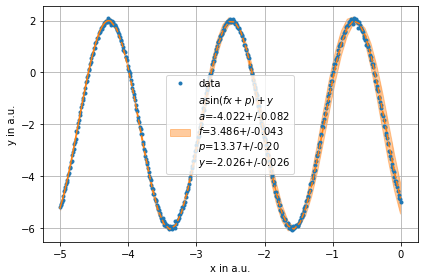

In [18]:
def sinus(x,a,f,p,y):
    return a*unp.sin(f*x+p)+y
x= np.linspace(-5,5,1000)
y = stat.noisy(np.sin(3.5*x +4)*4,std=0.05)-2
ff = plot.fit(x[x<0], y[x<0],sinus, fmt='.', label='data', xlabel="x in a.u.",ylabel="y in a.u.",sigmas=1,frange=[0,75])

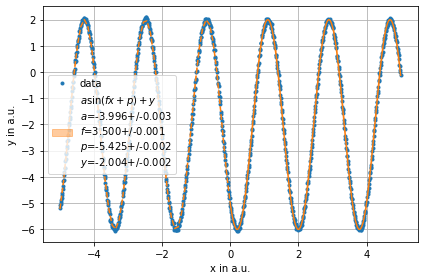

In [16]:
x= np.linspace(-5,5,1000)
y = stat.noisy(np.sin(3.5*x +4)*4,std=0.05)-2
ff = plot.fit(x, y,sinus, fmt='.', label='data', xlabel="x in a.u.",ylabel="y in a.u.",sigmas=1,fselector= x>0)

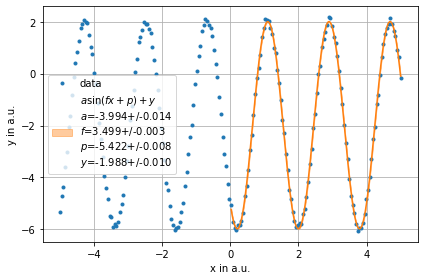

In [15]:
x= np.linspace(-5,5,200)
y = stat.noisy(np.sin(3.5*x +4)*4,std=0.1)-2
ff = plot.fit(x, y,sinus, fmt='.', label='data', xlabel="x in a.u.",ylabel="y in a.u.",sigmas=1,fselector= x>0,interpolate=False)